# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [183]:
import math

def altitude(T):
   
  
    G = 6.67e-11  
    M = 5.97e24   
    R = 6371e3   

    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3) - R

    return h 

T = 6000  
altitude_value = altitude(T)
print(f"The altitude of the satellite is {altitude_value} meters.")

The altitude of the satellite is 763238.8150119493 meters.


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [129]:
geosync = 0
hourhalf = 0
min45 = 0

import math

def altitude(T):
    G = 6.67e-11  
    M = 5.97e24   
    R = 6371e3     

    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3) - R
    return h

T_geo = 86400 
T_90 = 5400   
T_45 = 2700    


print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

24 hours: Altitude = -6371000.0 ; 90 min: Altitude = -6371000.0 ;  45 min: Altitude = -6371000.0


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [138]:
persidereal = 0

import math

def altitude(T):
    G = 6.67e-11  
    M = 5.97e24   
    R = 6371e3    

    
    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3) - R
    return h


geosync = 86400  
T_90 = 5400  

print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(persidereal))
print("90 min: Altitude =", altitude(T_90) / 1000, "km")

24 hours: Altitude = 35855910.176174976 ; 90 min: Altitude = -6371000.0
90 min: Altitude = 279.3216253728606 km


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

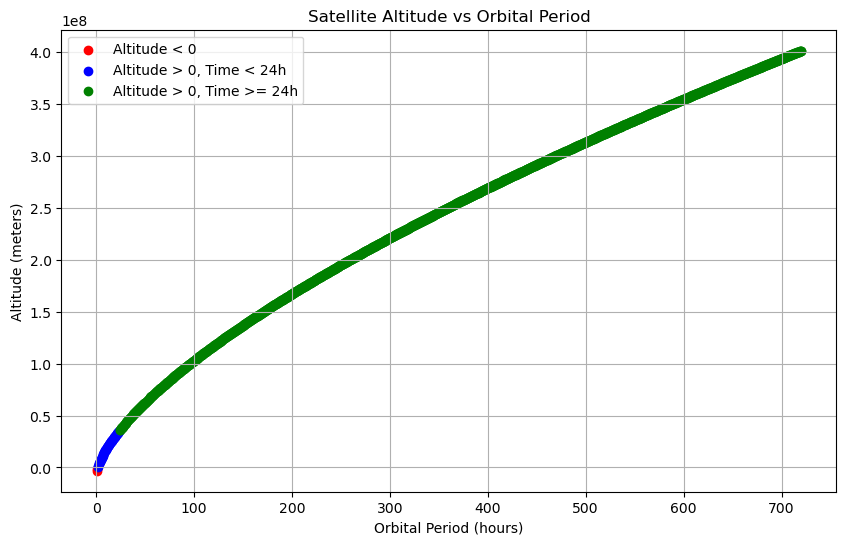

In [147]:
import math
import numpy as np
import matplotlib.pyplot as plt


def altitude(T):
    G = 6.67e-11  
    M = 5.97e24   
    R = 6371e3    

    
    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3) - R
    return h


time_hours = np.arange(0.5, 30 * 24 + 0.5, 0.5)


time_seconds = time_hours * 3600


altitudes = np.array([altitude(t) for t in time_seconds])


plt.figure(figsize=(10, 6))


plt.scatter(time_hours[altitudes < 0], altitudes[altitudes < 0], color='red', label="Altitude < 0")


plt.scatter(time_hours[(altitudes >= 0) & (time_hours < 24)], altitudes[(altitudes >= 0) & (time_hours < 24)], color='blue', label="Altitude > 0, Time < 24h")


plt.scatter(time_hours[(altitudes >= 0) & (time_hours >= 24)], altitudes[(altitudes >= 0) & (time_hours >= 24)], color='green', label="Altitude > 0, Time >= 24h")


plt.xlabel("Orbital Period (hours)")
plt.ylabel("Altitude (meters)")
plt.title("Satellite Altitude vs Orbital Period")
plt.legend()
plt.grid(True)


plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [171]:
import math

a = 1
b = -3
c = 2


discriminant = b**2 - 4*a*c
if discriminant >= 0:
    x1 = (-b + math.sqrt(discriminant)) / (2 * a)  
    x2 = (-b - math.sqrt(discriminant)) / (2 * a)  
    print("Roots are x1 =", x1, "and x2 =", x2)
else:
    print("No real roots.")


Roots are x1 = 2.0 and x2 = 1.0


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [179]:
import math


def travel_time(distance, speed):
    
    time_earth = distance / speed

   
    gamma = 1 / math.sqrt(1 - speed**2)

    return time_earth, time_spaceship


distance = 10

speeds = [0.90, 0.98, 0.999]


for speed in speeds:
    time_earth, time_spaceship = travel_time(distance, speed)
    print(f"Speed = {speed}c")
    print(f"  Time on Earth: {time_earth:} years")
    print(f"  Time on spaceship: {time_spaceship:} years")


Speed = 0.9c
  Time on Earth: 11.11111111111111 years
  Time on spaceship: 0.4475493274496098 years
Speed = 0.98c
  Time on Earth: 10.204081632653061 years
  Time on spaceship: 0.4475493274496098 years
Speed = 0.999c
  Time on Earth: 10.01001001001001 years
  Time on spaceship: 0.4475493274496098 years


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [112]:
import math

a = float(0.001)
b = int(1000)
c = float(0.001)

x1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2 * a)

x2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2 * a)

print(x1, x2)

-9.999894245993346e-07 -999999.999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [122]:
import math 

a = 0.001
b = 1000
c = 0.001

x1 = (2 * c) / (-b - math.sqrt(b**2 - 4*a*c))

x2 = 2 * c / (-b + math.sqrt(b**2 - 4*a*c))

print(x1,x2)

-1.000000000001e-06 -1000010.5755125057


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__

In [181]:
import math


a = 0.001
b = 1000
c = 0.001


discriminant = b**2 - 4 * a * c


if discriminant >= 0:
   
    x1 = (-b + math.sqrt(discriminant)) / (2 * a)
    x2 = (-b - math.sqrt(discriminant)) / (2 * a)
    print(f"Root 1: {x1}")
    print(f"Root 2: {x2}")
else:
    print("The equation has complex roots")

Root 1: -9.999894245993346e-07
Root 2: -999999.999999
